# Homework

## Problem 1

In [2]:
# For reading data sets from the web.
import pandas as pd
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras

In [3]:
wdbc_data = np.array(pd.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt",
                                  delim_whitespace = True,
                                  header = None))

In [4]:
wdbc_data.shape

In [27]:
X = wdbc_data[:,0:30] # 0,1,2,3,...,30
Y = wdbc_data[:,30] # 31
# Pretty-print with display()!
display(X.shape)
display(Y.shape)
display(Matrix(np.unique(Y)).T)

[0.0  1.0]

In [28]:
# define a function to mean_center the data
def mean_center(x):
    return x- np.mean(x)

Xcentered = np.apply_along_axis(mean_center,0,X)

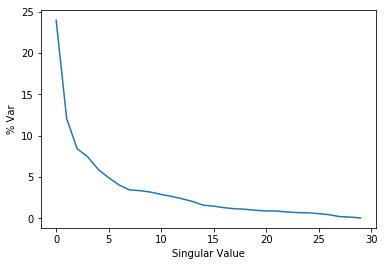

In [29]:
U,S,V = np.linalg.svd(Xcentered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [30]:
100.0*(S[0]+S[1])/np.sum(S)

### Only 36% accounted for in first two PCs

In [31]:
D = np.zeros([X.shape[0],X.shape[1]])
np.fill_diagonal(D,S)
Xrotated = np.dot(U,D)

PCs = Xrotated[:,0:2]
PCs.shape

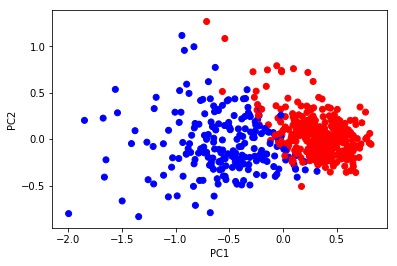

In [32]:
plt.scatter(PCs[:,0],PCs[:,1],
    color=[['red','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### We can see from this plot that our first two labels do a pretty good job of creating a linear seperation of our two catagories.  It is not surprising that more features are required to completely seperate them.  I think a linear network would be fairly good at classifying this data set.

## Problem 2

In [33]:
c_data = np.array(pd.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/cancer-data.txt",
                                  delim_whitespace = True,
                                  header = None))

In [34]:
c_data.shape

In [35]:
X2 = c_data[:,0:9] # 0,1,2,3,...,9
Y2 = c_data[:,9] # 10

display(X2.shape)
display(Y2.shape)
display(Matrix(np.unique(Y2)).T)

[0.0  1.0  2.0  3.0  4.0  5.0]

In [36]:
X2centered = np.apply_along_axis(mean_center,0,X2)

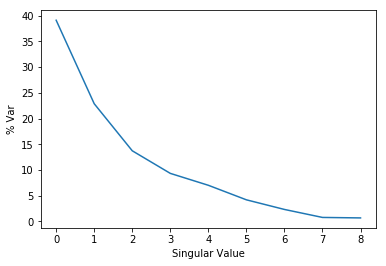

In [37]:
U2,S2,V2 = np.linalg.svd(X2centered,full_matrices=True)

# Percent variance accounted for
plt.plot(100.0*S2/np.sum(S2))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [38]:
100.0*(S2[0]+S2[1])/np.sum(S2)

### 62% of our variance accounted for by the first 2 PCs

In [39]:
D2 = np.zeros([X2.shape[0],X2.shape[1]])
np.fill_diagonal(D2,S2)
X2rotated = np.dot(U2,D2)

PCs2 = X2rotated[:,0:2]
PCs2.shape

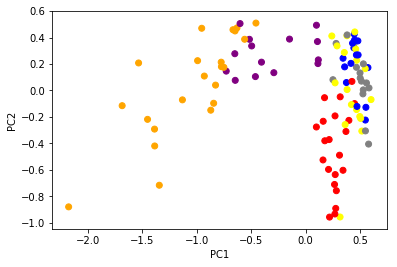

In [40]:
plt.scatter(PCs2[:,0],PCs2[:,1],
    color=[['red','blue','yellow','grey','purple', 'orange'][i] for i in Y2.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### This data has three easily identified and seperable categories that we can see.  However, three others are basically right on top of each other.  We would require a multi-layer network with non-linear activation functions in the hidden layer/s.  We may want to anaylize this data further, i.e. at least in 3D, before creating a network.